Experiment 2: Bragg Diffraction
Kaimi Kahihikolo
Exp. Conducted: 28 March 2017

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf
from scipy import asarray as ar,exp

from astropy import units as u

from uncertainties import ufloat
from uncertainties.umath import *

from pylab import rcParams

rcParams['figure.figsize'] = 18, 9
rcParams.update({'font.size': 22})


main_dir = "/Volumes/FLASH/School/S2017/PHYS274L/Lab2/"

In [5]:
#a_theo = 3.8e-2
#d_a_theo = 0.1e-2

a_theo = ufloat(3.8e-2, 0.1e-2)
print(a_theo)
#freq = 1.05e10 ## Hz
#d_freq = 0.01e10 ## Hz

freq = ufloat(1.05e10, 0.01e10)

c = 299792458 ## Speed of light [m/s]

def gaus(xval,yval,x_int,sigma_gauss):
    return yval*exp(-(xval-x_int)**2/(2*sigma_gauss**2))

1.0 nm
0.0380+/-0.0010


TypeError: only length-1 arrays can be converted to Python scalars

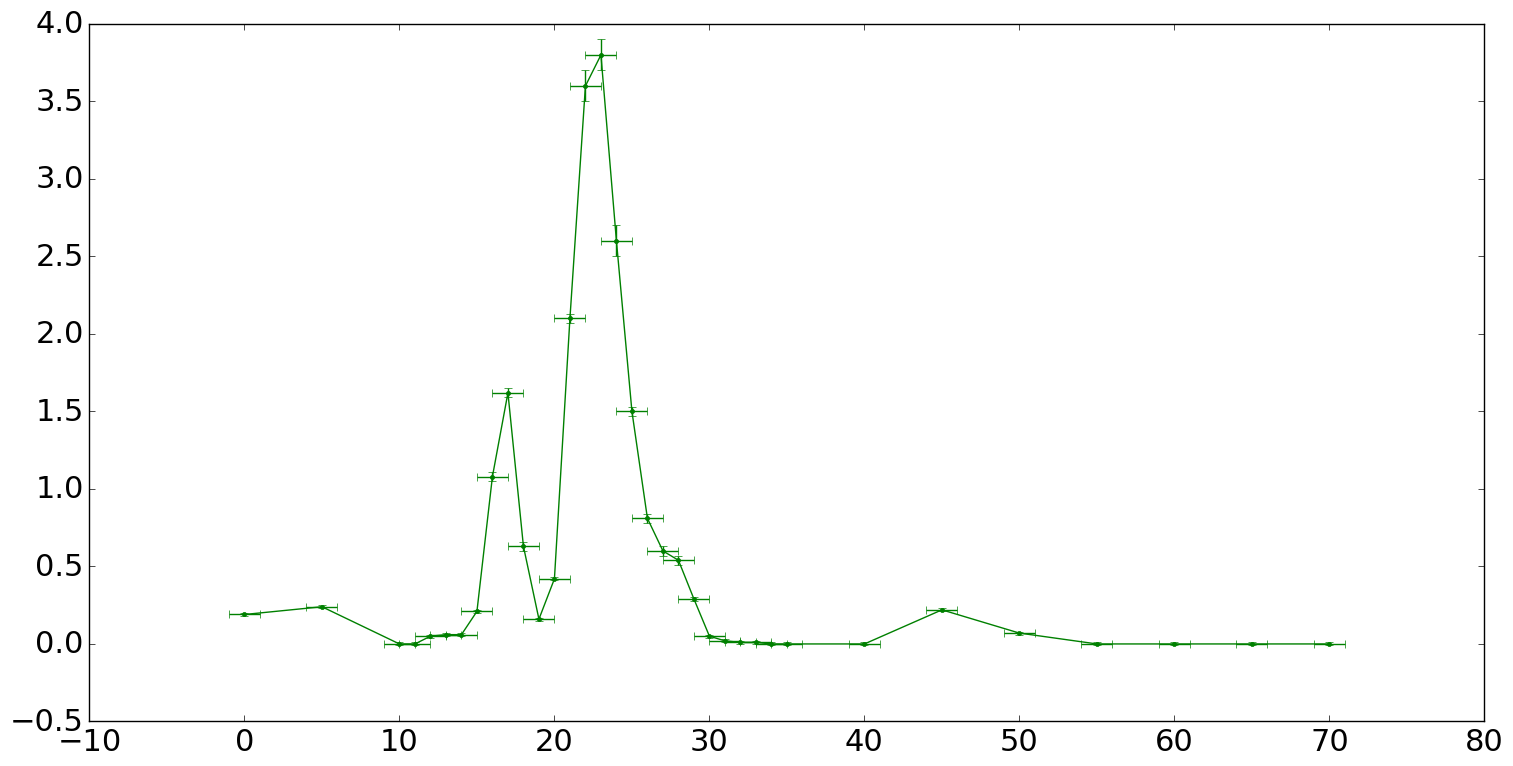

In [141]:
## A : 1,0,0 Data

A_data = np.genfromtxt(main_dir+"D100.txt", delimiter=',')

A_theta, A_d_theta, A_I, A_d_I = (A_data[:,0], A_data[:,1], 
                                A_data[:,2], A_data[:,3])

plt.errorbar(A_theta, A_I, xerr=A_d_theta, yerr=A_d_I, fmt='.',
             color='green', label="Index (1,0,0)")
plt.plot(A_theta, A_I, color='green')


'''
## Peak 1
x = A_theta[3:29]
y = A_I[3:29]
d_y = A_d_I[3:29]

n = len(x)
mean = sum(x * y) / n
sigma = sum(y*(x - mean)**2)/n

popt,pcov = cf(gaus,x,y,p0=[4.0,mean,sigma])
plt.plot(x,gaus(x,*popt),'k-',label='fit')

## Peak 2
x = A_theta[18:29]
y = A_I[18:29]
d_y = A_d_I[18:29]

n = len(x)
mean = sum(x * y) / n
sigma = sum(y*(x - mean)**2)/n

popt,pcov = cf(gaus,x,y,p0=[4.0,mean,sigma])
plt.plot(x,gaus(x,*popt),'k-')
'''

## B : 2,1,0 Data

B_data = np.genfromtxt(main_dir+"D210.txt", delimiter=',')

B_theta, B_d_theta, B_I, B_d_I = (B_data[:,0], B_data[:,1], 
                                B_data[:,2], B_data[:,3])

plt.errorbar(B_theta, B_I, xerr=B_d_theta, yerr=B_d_I, fmt='.', 
             color='blue', label="Index (2,1,0)")
plt.plot(B_theta, B_I, color='blue')
'''
# Peak 1
x = B_theta[19:33]
y = B_I[19:33]
d_y = B_d_I[19:33]

n = len(x)
mean = sum(x * y) / n
sigma = sum(y*(x - mean)**2)/n

popt,pcov = cf(gaus,x,y,p0=[4.0,mean,sigma])
plt.plot(x,gaus(x,*popt),'k-')

# Peak 2
x = B_theta[0:5]
y = B_I[0:5]
d_y = B_d_I[0:5]

n = len(x)
mean = sum(x * y) / n
sigma = sum(y*(x - mean)**2)/n

popt,pcov = cf(gaus,x,y,p0=[1.0,mean,sigma])
plt.plot(x,gaus(x,*popt),'k-')
'''

plt.plot()

plt.title("Current vs. Grazing Angle for (1,0,0) and (2,1,0)")
plt.ylabel("Intensity [mA]")
plt.xlabel("${\\theta_g}$ [deg]")
plt.xlim(-1, 71)
plt.legend()
plt.grid()
plt.show()


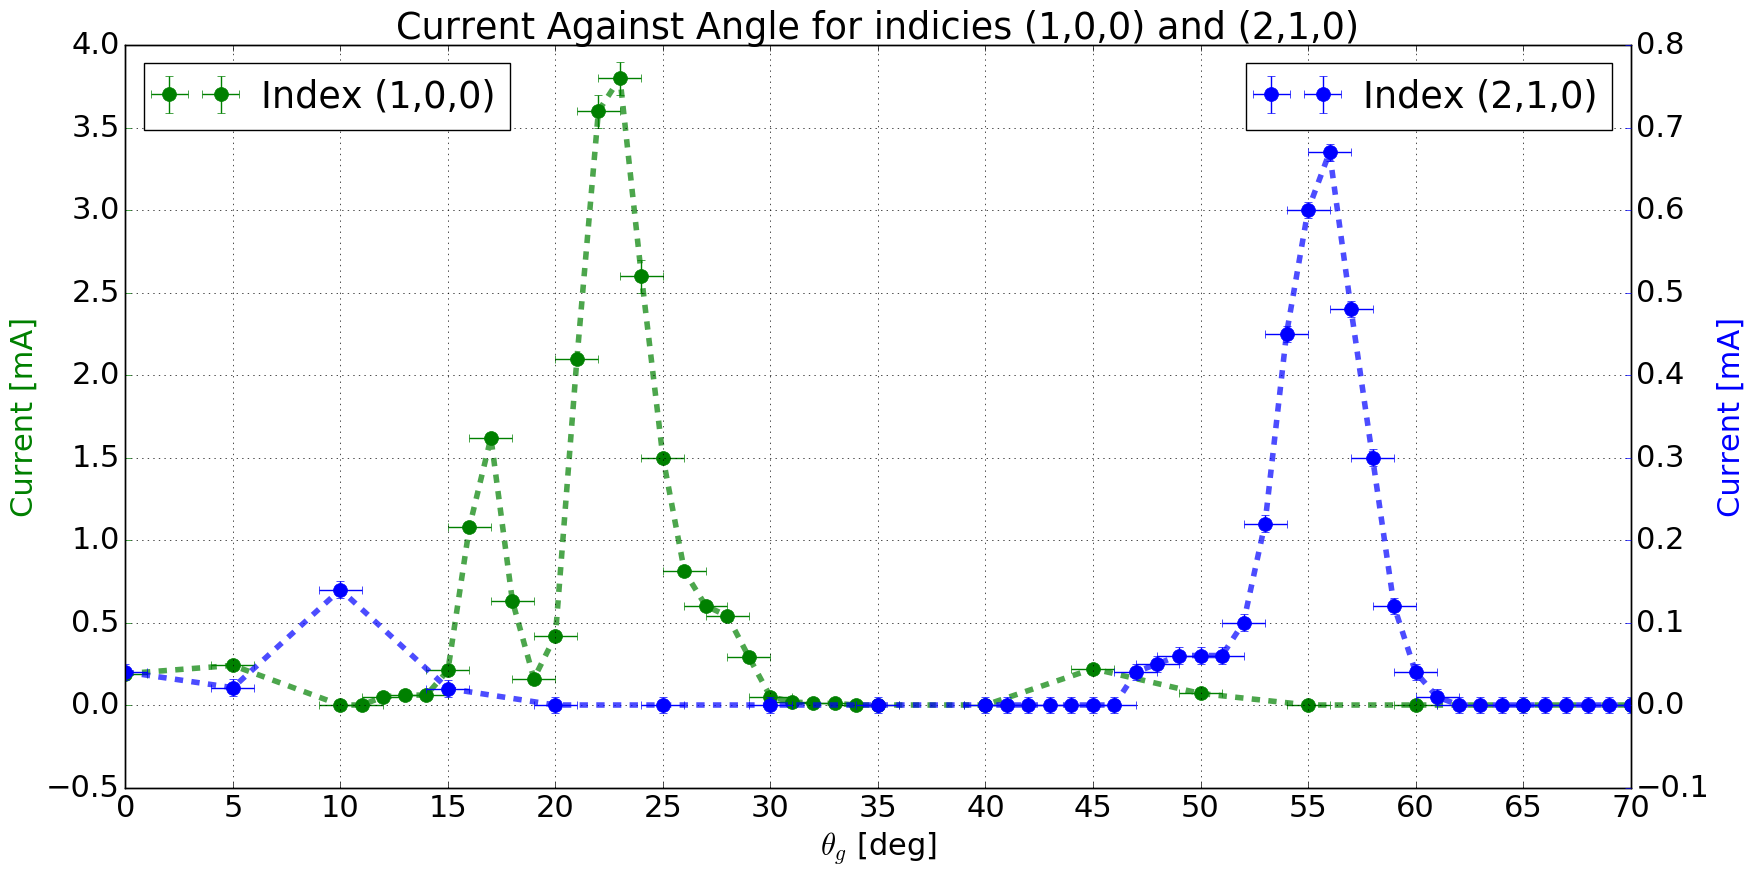

In [142]:
fig, ax1 = plt.subplots()

## A : 1,0,0 Data

A_data = np.genfromtxt(main_dir+"D100.txt", delimiter=',')

A_theta, A_d_theta, A_I, A_d_I = (A_data[:,0], A_data[:,1], 
                                A_data[:,2], A_data[:,3])

ax1.errorbar(A_theta, A_I, xerr=A_d_theta, yerr=A_d_I, fmt='.', ms=20,
             color='green', label="Index (1,0,0)")
ax1.plot(A_theta, A_I, 'g--', linewidth=4, alpha=0.7)
ax1.set_xlabel("${\\theta_g}$ [deg]")
ax1.set_xticks(np.arange(71, step=5))
ax1.set_ylabel("Current [mA]", color='green')
ax1.tick_params('y', color='green')
ax1.grid()
ax1.legend(loc="upper left")
ax1.set_ylim(-0.5, 4.0)

## B : 2,1,0 Data

B_data = np.genfromtxt(main_dir+"D210.txt", delimiter=',')

B_theta, B_d_theta, B_I, B_d_I = (B_data[:,0], B_data[:,1], 
                                B_data[:,2], B_data[:,3])

ax2 = ax1.twinx()
ax2.errorbar(B_theta, B_I, xerr=B_d_theta, yerr=B_d_I, fmt='.', ms=20,
             color='blue', label="Index (2,1,0)")
ax2.plot(B_theta, B_I, 'b--', linewidth=4, alpha=0.7)
ax2.set_ylabel("Current [mA]", color='blue')
ax2.tick_params('y', color='blue')
ax2.legend(loc = "upper right")
ax2.set_ylim(-0.1, 0.8)

fig.tight_layout()
plt.xlim(0,70)
plt.title("Current Against Angle for indicies (1,0,0) and (2,1,0)")
plt.savefig(main_dir+"plot.png",dpi=300)
#plt.show()


# Theoretical Value Calculations

In [108]:
wavelen = c/freq

print("Wavelength = %s [m]") %(wavelen)

d_100 = (a_theo / np.sqrt(1**2+0**2+0**2)) * u.meter


d_210 = (a_theo / np.sqrt(2**2+1**2+0**2)) * u.meter

print("Miller Indicies: \n 100: %s \n 210: %s")%(d_100,
                                                d_210)

theta_100_theo_1 = asin(wavelen/(2*d_100)) *(180.0/np.pi)
theta_100_theo_2 = asin(2*wavelen/(2*d_100)) *(180.0/np.pi)
theta_210_theo = asin(wavelen/(2*d_210)) *(180.0/np.pi)


print("Theoretical Theta [deg]: \n 100: \n\t %s \n\t %s \n 210: \n\t %s") %(theta_100_theo_1,
                                                         theta_100_theo_2,
                                                         theta_210_theo)


Wavelength = 0.02855+/-0.00027 [m]
Miller Indicies: 
 100: 0.0380+/-0.0010 
 210: 0.0170+/-0.0004
Theoretical Theta [deg]: 
 100: 
	 22.1+/-0.7 
	 48.7+/-1.8 
 210: 
	 57.1+/-2.5


# Experimental Values

In [183]:
theta_100_exp_1 = ufloat(3.0, 1.0)
theta_100_exp_2 = ufloat(17.0, 0.5)
theta_100_exp_3 = ufloat(22.0, 2.0)
theta_100_exp_4 = ufloat(46.0, 1.0)

print("100 Experimetal Theta [deg]: \n\t %s \n\t %s \n\t %s \n\t %s") %(theta_100_exp_1,
                                                         theta_100_exp_2,
                                                        theta_100_exp_3,
                                                        theta_100_exp_4)

theta_210_exp_1 = ufloat(1.0, 2.0)
theta_210_exp_2 = ufloat(10, 0.5)
theta_210_exp_3 = ufloat(55.5, 2.0)

print("210 Experimetal Theta [deg]: \n\t %s \n\t %s \n\t %s") %(theta_210_exp_1,
                                                         theta_210_exp_2,
                                                        theta_210_exp_3)

100 Experimetal Theta [deg]: 
	 3.0+/-1.0 
	 17.0+/-0.5 
	 22.0+/-2.0 
	 46.0+/-1.0
210 Experimetal Theta [deg]: 
	 1.0+/-2.0 
	 10.0+/-0.5 
	 55.5+/-2.0


# Calculations

In [220]:
## -- Calculate d_exp

## d = n \lambda / 2sin\theta

## --- 100
#d_100_exp_1 = (1.0*wavelen)/(2.0*sin(theta_100_exp_1 * (np.pi/180.0)))
#d_100_exp_2 = (2.0*wavelen)/(2.0*sin(theta_100_exp_2 * (np.pi/180.0)))
d_100_exp_3 = (1.0*wavelen)/(2.0*sin(theta_100_exp_3 * (np.pi/180.0))) ##
#d_100_exp_4 = (2.0*wavelen)/(2.0*sin(theta_100_exp_4 * (np.pi/180.0))) 

print(d_100_exp_3)

## Z score

print("Z-score = %s $\\sigma$")%((d_100.n-d_100_exp_3.n)/d_100_exp_3.s)

## --- 210
#d_210_exp_1 = (1.0*wavelen)/(2.0*sin(theta_210_exp_1 * (np.pi/180.0)))
#d_210_exp_1 = 0.0
#d_210_exp_2 = (2.0*wavelen)/(2.0*sin(theta_210_exp_2 * (np.pi/180.0)))
d_210_exp_3 = (1.0*wavelen)/(2.0*sin(theta_210_exp_3 * (np.pi/180.0))) ##

print(d_210_exp_3)
print("Z-score = %s $\\sigma$")%((d_210.n-d_210_exp_3.n)/d_210_exp_3.s)

print("a_210 = %s [m]")%(d_210_exp_3*np.sqrt(5))


    

0.0381+/-0.0033
Z-score = -0.0328649982853 $\sigma$
0.0173+/-0.0004
Z-score = -0.734179035278 $\sigma$
a_210 = 0.0387+/-0.0010 [m]


In [200]:
print(repr((d_100-d_100_exp_3)*100.0 / d_100))

-200.85944444073445+/-27.323000474846996


In [203]:
(d_100 / d_100_exp_3)

0.3323811229721883+/-0.030185688861059667

In [206]:
(d_210.n - d_210_exp_3.n) / d_210_exp_3.s

-26.07262318566264